In [1]:
import pandas as pd
import matplotlib.pyplot as plt

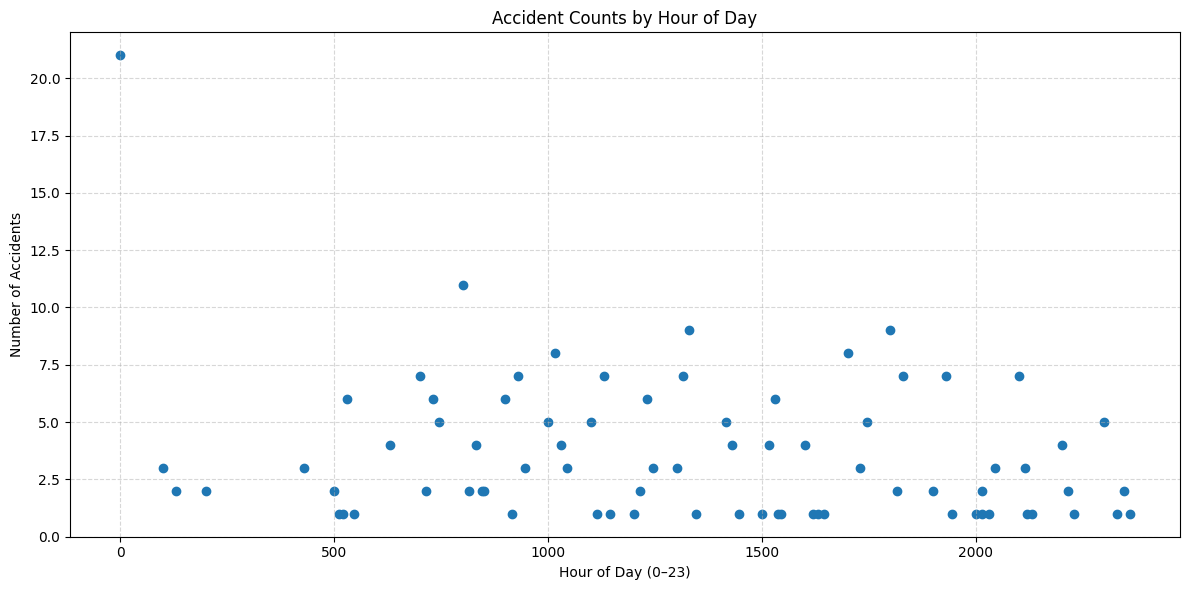

In [2]:
df = pd.read_csv("cleaned_dataset.csv")

# Ensure time_in_hours is numeric
df["time_in_hours"] = pd.to_numeric(df["time_in_hours"], errors="coerce")

# Count accidents per hour
hour_counts = df["time_in_hours"].value_counts().sort_index()

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(hour_counts.index, hour_counts.values)

plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.title("Accident Counts by Hour of Day")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\mvass\AppData\Local\Temp\ipykernel_28096\2690091995.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_exp.pivot_table(


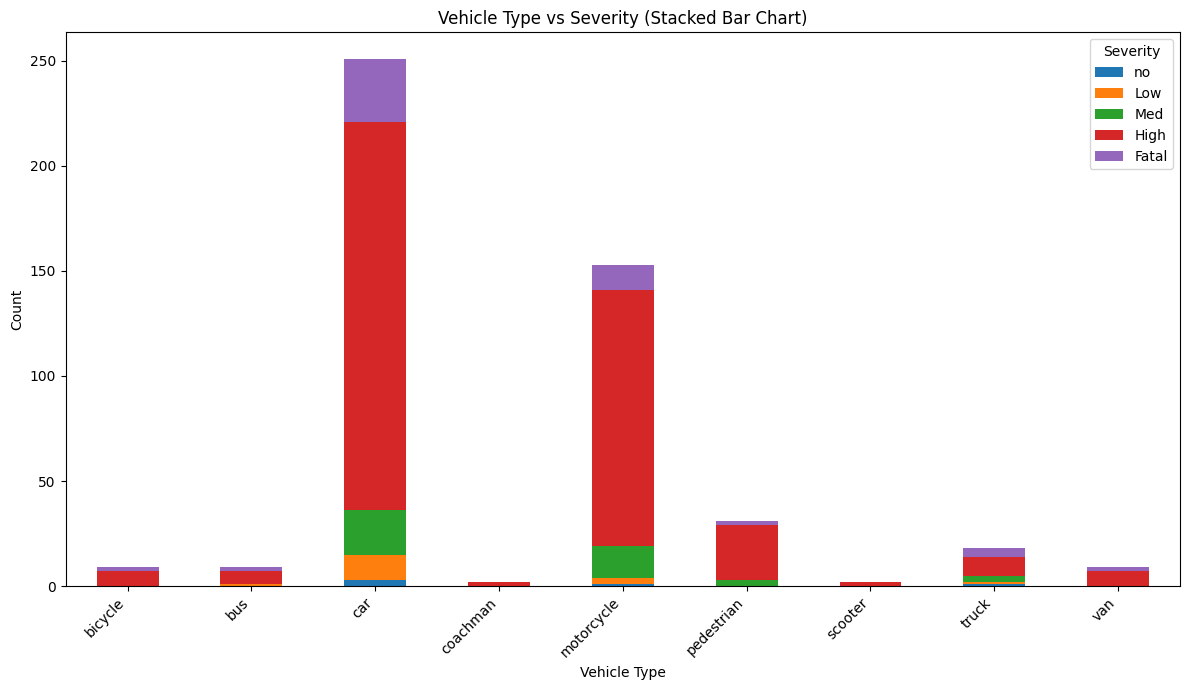

In [3]:
# Normalize severity case
severity_order = ['no', 'Low', 'Med', 'High', 'Fatal']
df['severity'] = (
    df['severity'].astype(str)
    .str.strip()
    .str.capitalize()
    .replace({'No': 'no'})
)
df['severity'] = pd.Categorical(df['severity'], categories=severity_order, ordered=True)

# Sort vehicle parts alphabetically so car-motorcycle == motorcycle-car
df['vehicle_normalized'] = (
    df['vehicle_involved']
      .astype(str)
      .str.lower()
      .str.replace(r'[^a-z-]', '', regex=True)
      .str.split('-')
      .apply(lambda x: '-'.join(sorted([i.strip() for i in x if i.strip()]))) #removes " " from list sorts alphabetically and joins back ex: ["motorcycle ", "","car"] -> ["car", "motorcycle"]
)

# Split into individual vehicle types
df['vehicle_list'] = df['vehicle_normalized'].str.split('-')

# Explode to individual rows per vehicle
df_exp = df.explode('vehicle_list')
df_exp.rename(columns={'vehicle_list': 'vehicle_type'}, inplace=True)

# --- PIVOT TABLE ---
pivot = df_exp.pivot_table(
    index="vehicle_type",
    columns="severity",
    aggfunc='size',
    fill_value=0
)

# --- PLOT ---
pivot.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title("Vehicle Type vs Severity (Stacked Bar Chart)")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Severity")
plt.tight_layout()

plt.show()
